In [2]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/professional_training_beginner folder/module12/Transactions.csv')

In [4]:
# Function to balance the dataset using SMOTE
def balance_data_with_smote(df, target_column):
    X = df.drop([target_column] + [col for col in df.columns if 'Unnamed' in col], axis=1)
    y = df[target_column]
    smote = SMOTE(random_state=1)
    X_resampled, y_resampled = smote.fit_resample(X.select_dtypes(include=[int, float]), y)
    balanced_df = pd.DataFrame(X_resampled, columns=X.select_dtypes(include=[int, float]).columns)
    balanced_df[target_column] = y_resampled
    return balanced_df

# Balance the dataset
balanced_df = balance_data_with_smote(df, 'TX_FRAUD_SCENARIO')

# Function to plot data imbalance
def plot_data_imbalance(data_frame, target_column):
    plt.figure(figsize=(8, 6))
    data_frame[target_column].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title('Class Distribution After SMOTE')
    plt.ylabel('')
    plt.show()

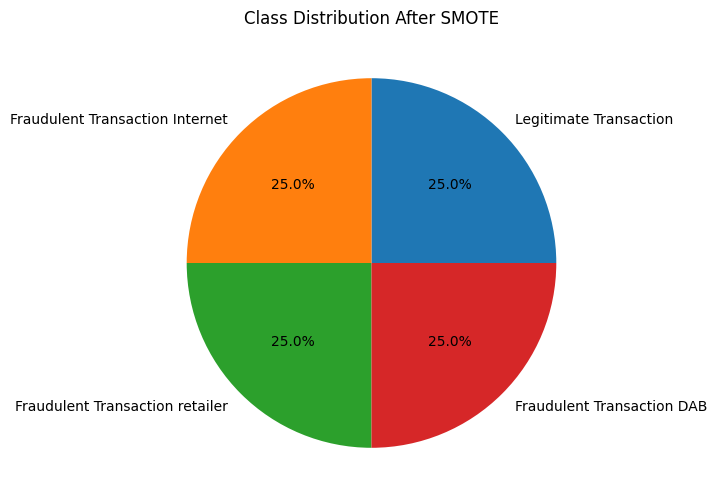

In [5]:

# Display the class distribution
plot_data_imbalance(balanced_df, 'TX_FRAUD_SCENARIO')

# Prepare data for model training
X = balanced_df.drop('TX_FRAUD_SCENARIO', axis=1)
y = balanced_df['TX_FRAUD_SCENARIO']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1)



In [34]:
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=1)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, dt_predictions))

Decision Tree Accuracy: 0.9988940544022621


In [7]:
# XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, xgb_predictions))

XGBoost Accuracy: 0.8036234025963547


In [8]:
# Cross-validation for more robust evaluation
dt_cv_scores = cross_val_score(dt_classifier, X, y_encoded, cv=5)
xgb_cv_scores = cross_val_score(xgb_classifier, X, y_encoded, cv=5)
print('Decision Tree Cross-Validation Accuracy:', dt_cv_scores.mean())
print('XGBoost Cross-Validation Accuracy:', xgb_cv_scores.mean())

Decision Tree Cross-Validation Accuracy: 0.7241734545675655
XGBoost Cross-Validation Accuracy: 0.6413828738319218


In [11]:
import numpy as np
import pandas as pd

# Filter only numeric columns for numerical statistics
numeric_cols = df.select_dtypes(include=[np.number])  # This ensures only numeric columns are included

# Calculate descriptive statistics for numerical features
numerical_stats = numeric_cols.describe().transpose()

# Calculate skewness and kurtosis for each numerical feature
numerical_stats['skew'] = numeric_cols.skew()
numerical_stats['kurtosis'] = numeric_cols.kurt()

# For categorical and datetime data, count the number of unique values
non_numeric_cols = df.select_dtypes(exclude=[np.number])  # Selects non-numeric columns
categorical_stats = non_numeric_cols.nunique().reset_index()
categorical_stats.columns = ['Feature', 'Unique_values']

# Merge numerical and categorical stats into a single DataFrame
full_stats = pd.concat([numerical_stats.reset_index(), categorical_stats]).fillna('')
full_stats.set_index('index', inplace=True)

# Save the combined statistics to a CSV file
full_stats.to_csv('feature_distributions.csv')

print("Descriptive statistics have been saved to 'feature_distributions.csv'.")


Descriptive statistics have been saved to 'feature_distributions.csv'.


In [14]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'TRANSACTION_ID', 'TX_DATETIME',
       'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS',
       'TX_TIME_DAYS', 'TX_FRAUD_SCENARIO'],
      dtype='object')

In [18]:
df_ = df[['CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT', 'TX_TIME_SECONDS','TX_TIME_DAYS', 'TX_FRAUD_SCENARIO']]

In [21]:
df['TX_FRAUD_SCENARIO'].unique()

array(['Legitimate Transaction', 'Fraudulent Transaction Internet',
       'Fraudulent Transaction retailer', 'Fraudulent Transaction DAB'],
      dtype=object)

In [26]:
df_['TX_FRAUD_']=(df_['TX_FRAUD_SCENARIO']!='Legitimate Transaction').astype(int)

<ipython-input-26-717977655ea2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['TX_FRAUD_']=(df_['TX_FRAUD_SCENARIO']!='Legitimate Transaction').astype(int)


In [27]:
df_['TX_FRAUD_'].value_counts()

TX_FRAUD_
0    1518186
1     235969
Name: count, dtype: int64

In [28]:
# Function to balance the dataset using SMOTE
def balance_data_with_smote_(df, target_column):
    X = df.drop([target_column] + [col for col in df.columns if 'Unnamed' in col], axis=1)
    y = df[target_column]
    smote = SMOTE(random_state=1)
    X_resampled, y_resampled = smote.fit_resample(X.select_dtypes(include=[int, float]), y)
    balanced_df = pd.DataFrame(X_resampled, columns=X.select_dtypes(include=[int, float]).columns)
    balanced_df[target_column] = y_resampled
    return balanced_df

In [31]:
df_.drop('TX_FRAUD_SCENARIO', inplace=True, axis=1)

<ipython-input-31-ce6965eb7551>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.drop('TX_FRAUD_SCENARIO', inplace=True, axis=1)


In [32]:
df_

,CUSTOMER_ID,TERMINAL_ID,TX_AMOUNT,TX_TIME_SECONDS,TX_TIME_DAYS,TX_FRAUD_
0,596,3156,533.07,31,0,0
1,4961,3412,808.56,130,0,0
2,2,1365,1442.94,476,0,1
3,4128,8737,620.65,569,0,0
4,927,9906,490.66,634,0,0
...,...,...,...,...,...,...
1754150,161,655,531.43,15810996,182,0
1754151,4342,6181,10.40,15811058,182,0
1754152,618,1502,26.62,15811101,182,0
1754153,4056,3067,550.43,15811192,182,0


In [ ]:
# Balance the dataset
balanced_df = balance_data_with_smote(df, 'TX_FRAUD_')

### Teste removendo variáveis

In [33]:
# Prepare data for model training
X = df_.drop('TX_FRAUD_', axis=1)
y = df_['TX_FRAUD_']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=1)

In [38]:
# Decision Tree Classifier

dt_classifier = DecisionTreeClassifier(random_state=1)
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
print('Decision Tree Accuracy:', accuracy_score(y_test, dt_predictions))

Decision Tree Accuracy: 0.9988940544022621


In [37]:
# XGBoost Classifier

xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_classifier.fit(X_train, y_train)
xgb_predictions = xgb_classifier.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, xgb_predictions))

XGBoost Accuracy: 0.9945700351451269


In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=1)
log_reg.fit(X_train, y_train)
log_reg_predictions = log_reg.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, log_reg_predictions))


Logistic Regression Accuracy: 0.8939090331242108


In [40]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)
print('KNN Accuracy:', accuracy_score(y_test, knn_predictions))


KNN Accuracy: 0.8860362966784577


In [ ]:
# Cross-validation for more robust evaluation
dt_cv_scores = cross_val_score(dt_classifier, X, y_encoded, cv=5)
xgb_cv_scores = cross_val_score(xgb_classifier, X, y_encoded, cv=5)
print('Decision Tree Cross-Validation Accuracy:', dt_cv_scores.mean())
print('XGBoost Cross-Validation Accuracy:', xgb_cv_scores.mean())

In [42]:
from sklearn.model_selection import cross_val_score

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=1)
dt_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)
dt_accuracy = dt_scores.mean()
print('Decision Tree Average Cross-Validation Accuracy:', dt_accuracy)

# XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5)
xgb_accuracy = xgb_scores.mean()
print('XGBoost Average Cross-Validation Accuracy:', xgb_accuracy)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state=1)
logistic_scores = cross_val_score(logistic_classifier, X_train, y_train, cv=5)
logistic_accuracy = logistic_scores.mean()
print('Logistic Regression Average Cross-Validation Accuracy:', logistic_accuracy)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors'
knn_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
knn_accuracy = knn_scores.mean()
print('K-Nearest Neighbors Average Cross-Validation Accuracy:', knn_accuracy)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)  # You can adjust 'n_estimators'
rf_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
rf_accuracy = rf_scores.mean()
print('Random Forest Average Cross-Validation Accuracy:', rf_accuracy)

Decision Tree Average Cross-Validation Accuracy: 0.9983959512716396
XGBoost Average Cross-Validation Accuracy: 0.9945322675349088
Logistic Regression Average Cross-Validation Accuracy: 0.8927688827591809
K-Nearest Neighbors Average Cross-Validation Accuracy: 0.8829443519800144


KeyboardInterrupt: 

In [43]:
from sklearn.model_selection import cross_val_score

# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=1)
dt_scores = cross_val_score(dt_classifier, X_train, y_train, cv=5)
dt_accuracy = dt_scores.mean()
print('Decision Tree Accuracy:', dt_accuracy)
print('Decision Tree Cross-Validation Scores:', dt_scores)

# XGBoost Classifier
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_scores = cross_val_score(xgb_classifier, X_train, y_train, cv=5)
xgb_accuracy = xgb_scores.mean()
print('XGBoost Accuracy:', xgb_accuracy)
print('XGBoost Cross-Validation Scores:', xgb_scores)

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state=1)
logistic_scores = cross_val_score(logistic_classifier, X_train, y_train, cv=5)
logistic_accuracy = logistic_scores.mean()
print('Logistic Regression Accuracy:', logistic_accuracy)
print('Logistic Regression Cross-Validation Scores:', logistic_scores)

# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust 'n_neighbors'
knn_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5)
knn_accuracy = knn_scores.mean()
print('K-Nearest Neighbors Accuracy:', knn_accuracy)
print('K-Nearest Neighbors Cross-Validation Scores:', knn_scores)



Decision Tree Accuracy: 0.9983959512716396
Decision Tree Cross-Validation Scores: [0.99862469 0.99830046 0.99836816 0.99836816 0.99831827]
XGBoost Accuracy: 0.9945322675349088
XGBoost Cross-Validation Scores: [0.99475888 0.99443108 0.99469474 0.99443821 0.99433843]
Logistic Regression Accuracy: 0.8927688827591809
Logistic Regression Cross-Validation Scores: [0.89329984 0.89232003 0.89261219 0.89321433 0.89239803]
K-Nearest Neighbors Accuracy: 0.8829443519800144
K-Nearest Neighbors Cross-Validation Scores: [0.88309551 0.88274277 0.88289242 0.88324871 0.88274235]


In [44]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=50, max_depth=5, n_jobs=-1, random_state=1)
rf_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)
rf_accuracy = rf_scores.mean()
print('Random Forest Accuracy:', rf_accuracy)
print('Random Forest Cross-Validation Scores:', rf_scores)

Random Forest Accuracy: 0.9952990185127097
Random Forest Cross-Validation Scores: [0.99546078 0.9953147  0.99533608 0.99522919 0.99515435]
